In [1]:
import pandas as pd, scipy.stats as stats, seaborn as sns, matplotlib.pyplot as plt
import ast

url = "https://raw.githubusercontent.com/nkmwicz/worldcup2018data/refs/heads/main/cleaned_events_world_cup2018.csv"

df = pd.read_csv(url)
df["tags"] = df["tags"].apply(ast.literal_eval)
print(ast.literal_eval)
df.head()

<function literal_eval at 0x0000028BCA68E5C0>


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0


In [2]:
# function to return win, loss, tie
def get_outcome(row):
    matchId = row["matchId"]
    teamId = row["teamId"]

    teams, scores = matchId.split(",")
    home, away = teams.split("-")
    home_score, away_score = scores.split("-")
    away_score = away_score.split("(")[0]
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score == away_score:
        return "tie"
    if home_score > away_score:
        if home.strip().lower() == teamId.strip().lower():
            return "win"
        else:
            return "loss"
    else:
        if away.strip().lower() == teamId.strip().lower():
            return "win"
        else:
            return "loss"


df["outcome"] = df[["matchId", "teamId"]].apply(get_outcome, axis=1)
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss


In [3]:
# first started with just passes starting in A3
# decided to find accurate.

df["pass_a3"] = (
    (df["eventName"] == "Pass")
    & (df["x1"] > 66)
    & (df["x2"] > df["x1"]) # new line
    & (df["tags"].apply(lambda x: "Accurate" in x))  # Fixed line
)

In [4]:
# df["tags"].includes

In [5]:
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False


In [6]:
group_df = (
    df.groupby(["matchId", "teamId"])
    .agg(
        passes=("pass_a3", "sum"),
        outcome=("outcome", "first"),
    )
    .reset_index()
)
group_df

,matchId,teamId,passes,outcome
0,"Argentina - Croatia, 0 - 3",Argentina,22,loss
1,"Argentina - Croatia, 0 - 3",Croatia,11,win
2,"Argentina - Iceland, 1 - 1",Argentina,91,tie
3,"Argentina - Iceland, 1 - 1",Iceland,16,tie
4,"Australia - Peru, 0 - 2",Australia,48,loss
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,21,win
124,"Uruguay - Russia, 3 - 0",Russia,28,loss
125,"Uruguay - Russia, 3 - 0",Uruguay,26,win
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,55,loss


<Axes: xlabel='outcome', ylabel='passes'>

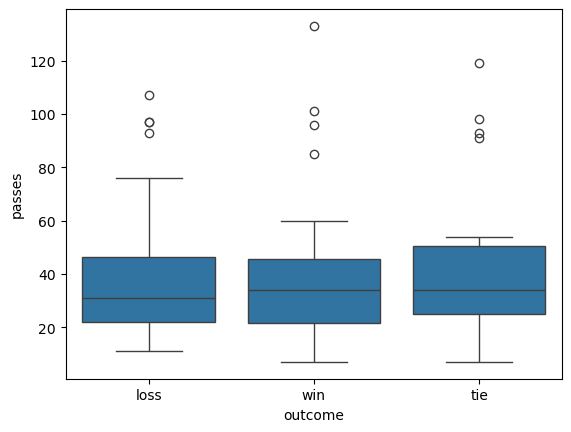

In [7]:
sns.boxplot(data=group_df, y="passes", x="outcome")

In [8]:
u_outcomes = group_df["outcome"].unique()  # ["win", "loss", "tie"]
values_list = [
    group_df.loc[group_df["outcome"] == outcome, "passes"] for outcome in u_outcomes
]
# values_list

In [9]:
f, p = stats.f_oneway(*values_list)
print(f"f={f:.2f}, p={p:.2f}")

f=0.40, p=0.67


In [10]:
# Correlation passes-A3 to goals
# add goals column
df['goal'] = df.apply(lambda row: row['eventName'] == 'Shot' and 'Goal' in row['tags'], axis=1).astype(int)
df['goal'].sum()

np.int64(128)

In [11]:
tags = set([tag for l in df['tags'] for tag in l])
tags

{'Accurate',
 'Anticipated',
 'Anticipation',
 'Assist',
 'Blocked',
 'Counter attack',
 'Dangerous ball lost',
 'Direct',
 'Fairplay',
 'Feint',
 'Free space left',
 'Free space right',
 'Goal',
 'Head/body',
 'High',
 'Indirect',
 'Interception',
 'Key pass',
 'Left foot',
 'Lost',
 'Missed ball',
 'Neutral',
 'Not accurate',
 'Opportunity',
 'Own goal',
 'Position: Goal center',
 'Position: Goal center left',
 'Position: Goal center right',
 'Position: Goal high center',
 'Position: Goal high left',
 'Position: Goal high right',
 'Position: Goal low center',
 'Position: Goal low left',
 'Position: Goal low right',
 'Position: Out center left',
 'Position: Out center right',
 'Position: Out high center',
 'Position: Out high left',
 'Position: Out high right',
 'Position: Out low left',
 'Position: Out low right',
 'Position: Post center left',
 'Position: Post center right',
 'Position: Post high center',
 'Position: Post high left',
 'Position: Post high right',
 'Position: Post lo

In [12]:
p_g_group = df.groupby(['matchId', 'teamId']).agg(
    passes=('pass_a3', 'sum'),
    goals=('goal', 'sum')
).reset_index()
p_g_group

,matchId,teamId,passes,goals
0,"Argentina - Croatia, 0 - 3",Argentina,22,0
1,"Argentina - Croatia, 0 - 3",Croatia,11,3
2,"Argentina - Iceland, 1 - 1",Argentina,91,1
3,"Argentina - Iceland, 1 - 1",Iceland,16,1
4,"Australia - Peru, 0 - 2",Australia,48,0
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,21,2
124,"Uruguay - Russia, 3 - 0",Russia,28,0
125,"Uruguay - Russia, 3 - 0",Uruguay,26,1
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,55,0


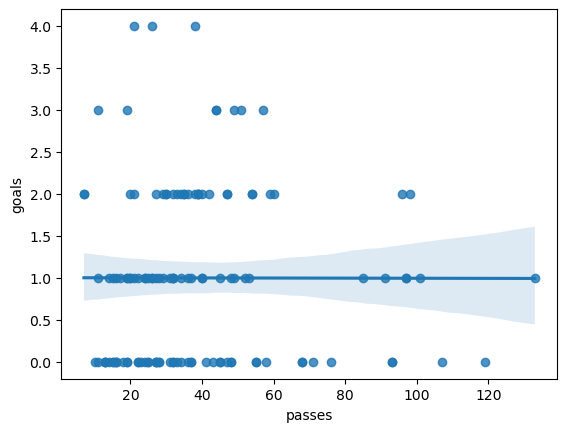

In [13]:
rplot = sns.regplot(data=p_g_group, x="passes", y="goals")

In [14]:
passes_a3 = p_g_group['passes']
goals_pg = p_g_group['goals']
r, p = stats.pearsonr(passes_a3, goals_pg)
print(f"r={r:.4f}, p={p:.4f}")

r=-0.0015, p=0.9862


In [15]:
# t-test with soft wins

def get_soft_outcome(row):
    matchId = row["matchId"]
    teamId = row["teamId"]

    teams, scores = matchId.split(",")
    home, away = teams.split("-")
    home_score, away_score = scores.split("-")
    away_score = away_score.split("(")[0]
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score == away_score:
        return "soft-win"
    if home_score > away_score:
        if home.strip().lower() == teamId.strip().lower():
            return "soft-win"
        else:
            return "soft-loss"
    else:
        if away.strip().lower() == teamId.strip().lower():
            return "soft-win"
        else:
            return "soft-loss"

df['soft-outcome'] = df.apply(get_soft_outcome, axis=1)
df.head()


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3,goal,soft-outcome
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False,0,soft-loss
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False,0,soft-loss
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False,0,soft-win
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False,0,soft-loss
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False,0,soft-loss


In [16]:
soft_group = df.groupby(['matchId', 'teamId']).agg(
    passes=('pass_a3', 'sum'),
    soft_outcome=('soft-outcome', 'first')
).reset_index()
soft_group

,matchId,teamId,passes,soft_outcome
0,"Argentina - Croatia, 0 - 3",Argentina,22,soft-loss
1,"Argentina - Croatia, 0 - 3",Croatia,11,soft-win
2,"Argentina - Iceland, 1 - 1",Argentina,91,soft-win
3,"Argentina - Iceland, 1 - 1",Iceland,16,soft-win
4,"Australia - Peru, 0 - 2",Australia,48,soft-loss
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,21,soft-win
124,"Uruguay - Russia, 3 - 0",Russia,28,soft-loss
125,"Uruguay - Russia, 3 - 0",Uruguay,26,soft-win
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,55,soft-loss


In [17]:
soft_wins = soft_group.loc[soft_group['soft_outcome']=='soft-win', 'passes']
soft_losses = soft_group.loc[soft_group['soft_outcome']=='soft-loss', 'passes']

t, p = stats.ttest_ind(soft_wins, soft_losses)
print(f"t={t:.4f}, p={p:.4f}")

t=0.2598, p=0.7955


In [19]:
# goals after transition
df['eventName'].unique()

array(['Pass', 'Duel', 'Free Kick', 'Foul', 'Others on the ball', 'Shot',
       'Save attempt', 'Offside', 'Goalkeeper leaving line'], dtype=object)

In [20]:
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3,goal,soft-outcome
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False,0,soft-loss
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False,0,soft-loss
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False,0,soft-win
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False,0,soft-loss
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False,0,soft-loss


In [21]:
counters = [tag for line in df['tags'] for tag in line if tag == "Counter attack"]
len(counters)

1834

In [24]:
df['counters'] = df['tags'].apply(lambda x: "Counter attack" in x).astype(int)
df.head()


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3,goal,soft-outcome,counters
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False,0,soft-loss,0
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False,0,soft-loss,0
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False,0,soft-win,0
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False,0,soft-loss,0
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False,0,soft-loss,0


In [ ]:
list_of_rows = []
clusters = []
window_time = 30.0

for row in df.itertuples():
    if row.counters:
        idx = row.Index
        cnt = 0
        start_time = row.eventSec
        end_time = start_time + window_time
        while True:
            if df.loc[idx+cnt,"eventSec"] <= end_time:
                list_of_rows.append(idx+cnt)
                clusters.append(idx)
                cnt += 1
            else:
                break
        
counter_windows = df.iloc[list_of_rows]
counter_windows['counter_idx'] = clusters
counter_windows.head()

C:\Users\michalewiczn\AppData\Local\Temp\ipykernel_13644\917711584.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counter_windows['counter_idx'] = clusters


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,...,x1,y1,x2,y2,outcome,pass_a3,goal,soft-outcome,counters,counter_idx
148,8,Simple pass,"[Counter attack, Accurate]",Aleksandr Golovin,"Russia - Saudi Arabia, 5 - 0",Pass,Russia,1H,391.694578,Simple pass,...,42,30,68.0,9.0,win,False,0,soft-win,1,148
149,7,Touch,[],Alan Dzagoev,"Russia - Saudi Arabia, 5 - 0",Others on the ball,Russia,1H,394.713448,Touch,...,68,9,83.0,15.0,win,False,0,soft-win,0,148
150,8,Simple pass,[Accurate],Alan Dzagoev,"Russia - Saudi Arabia, 5 - 0",Pass,Russia,1H,398.708523,Simple pass,...,83,15,64.0,87.0,win,False,0,soft-win,0,148
151,8,Simple pass,[Accurate],M\u00e1rio Figueira Fernandes,"Russia - Saudi Arabia, 5 - 0",Pass,Russia,1H,402.353114,Simple pass,...,64,87,80.0,76.0,win,False,0,soft-win,0,148
152,8,Smart pass,[Accurate],Fyodor Smolov,"Russia - Saudi Arabia, 5 - 0",Pass,Russia,1H,404.018669,Smart pass,...,80,76,95.0,79.0,win,True,0,soft-win,0,148


In [34]:
cluster_set = list(set(clusters))
cluster_set = sorted(cluster_set)
cluster_set

[148,
 200,
 201,
 202,
 203,
 359,
 360,
 361,
 362,
 363,
 364,
 375,
 376,
 430,
 431,
 575,
 576,
 577,
 879,
 880,
 881,
 882,
 883,
 1176,
 1177,
 1178,
 1376,
 1494,
 1496,
 1497,
 1499,
 1500,
 1501,
 1503,
 2436,
 2437,
 2438,
 2439,
 2553,
 2555,
 2556,
 2557,
 2671,
 2672,
 2673,
 2674,
 2675,
 2676,
 2677,
 2678,
 2960,
 2961,
 3068,
 3069,
 3070,
 3071,
 3072,
 3111,
 3112,
 3113,
 3114,
 3116,
 3345,
 3346,
 4019,
 4020,
 4021,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4030,
 4500,
 4501,
 5275,
 5276,
 5277,
 5278,
 5279,
 5280,
 5281,
 5282,
 5286,
 5287,
 5289,
 5290,
 5291,
 5292,
 5294,
 5295,
 5335,
 5336,
 5337,
 5724,
 5725,
 5726,
 5727,
 5729,
 5731,
 5732,
 6070,
 6072,
 6073,
 6074,
 6121,
 6122,
 6124,
 6134,
 6135,
 6138,
 6697,
 6698,
 6699,
 6701,
 6724,
 6725,
 6764,
 6765,
 6766,
 6767,
 6768,
 6769,
 6811,
 6812,
 6813,
 6814,
 6815,
 6958,
 6959,
 6961,
 7829,
 7830,
 7831,
 7832,
 7833,
 7834,
 7995,
 7996,
 7997,
 7998,
 7999,
 8285,
 8287,
 

In [49]:
# counter_windows['goal'] = (df[''])
counter_windows['shot'] = counter_windows['eventName'] == "Shot" 
counter_windows['shot'].sum()



C:\Users\michalewiczn\AppData\Local\Temp\ipykernel_13644\1259424191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counter_windows['shot'] = counter_windows['eventName'] == "Shot"


np.int64(1572)

In [46]:
counter_windows['shot'].sum()

np.int64(1572)

In [37]:
counter_group = counter_windows.groupby("counter_idx").agg(
    goals=("goal", "sum"),
    shots=("shot", "sum")
).reset_index()
counter_group

,counter_idx,goals,shots
0,148,0,1
1,200,0,0
2,201,0,0
3,202,0,0
4,203,0,0
...,...,...,...
1829,101523,0,0
1830,101524,0,0
1831,101698,0,0
1832,101699,0,0


In [44]:
counter_group['shots'].sum()

np.int64(1572)

In [43]:
df['counter_goal'] = 0
df['counter_shots'] = 0

for row in counter_group.itertuples():
    idx = row.counter_idx
    if row.shots > 0:
        df.loc[idx,"counter_shots"] = row.shots
    if row.goals > 0:
        df.loc[idx, "counter_goal"] = row.goals

df['counter_shots'].sum()


np.int64(1572)

In [42]:
df.loc[df['counter_shots'] > 0]

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,...,y1,x2,y2,outcome,pass_a3,goal,soft-outcome,counters,counter_goal,counter_shots
148,8,Simple pass,"[Counter attack, Accurate]",Aleksandr Golovin,"Russia - Saudi Arabia, 5 - 0",Pass,Russia,1H,391.694578,Simple pass,...,30,68.0,9.0,win,False,0,soft-win,1,0,1
2436,7,Acceleration,"[Counter attack, Interception, Accurate]",Mahmoud Ibrahim Hassan,"Egypt - Uruguay, 0 - 1",Others on the ball,Egypt,1H,2748.298157,Acceleration,...,20,84.0,24.0,loss,False,0,soft-loss,1,1,10
2437,8,Simple pass,"[Counter attack, Accurate]",Mahmoud Ibrahim Hassan,"Egypt - Uruguay, 0 - 1",Pass,Egypt,1H,2752.699183,Simple pass,...,24,83.0,37.0,loss,False,0,soft-loss,1,1,10
2438,8,Simple pass,"[Counter attack, Accurate]",Abdallah Mahmoud El Said Bekhit,"Egypt - Uruguay, 0 - 1",Pass,Egypt,1H,2753.193233,Simple pass,...,37,89.0,49.0,loss,True,0,soft-loss,1,1,10
2439,1,Ground loose ball duel,"[Counter attack, Lost, Not accurate]",Marwan Mohsen,"Egypt - Uruguay, 0 - 1",Duel,Egypt,1H,2753.799511,Ground loose ball duel,...,49,90.0,55.0,loss,False,0,soft-loss,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,10,Shot,"[Counter attack, Right foot, Position: Out cen...",Dries Mertens,"Belgium - England, 2 - 0",Shot,Belgium,2H,1826.532704,Shot,...,40,0.0,0.0,win,False,0,soft-win,1,0,1
101095,8,Simple pass,"[Counter attack, Accurate]",Paul Pogba,"France - Croatia, 4 - 2",Pass,France,2H,391.044930,Simple pass,...,81,76.0,96.0,win,False,0,soft-win,1,0,1
101096,7,Acceleration,"[Counter attack, Accurate]",Kylian Mbapp\u00e9 Lottin,"France - Croatia, 4 - 2",Others on the ball,France,2H,393.558162,Acceleration,...,96,83.0,81.0,win,False,0,soft-win,1,0,1
101097,1,Ground attacking duel,"[Counter attack, Free space right, Won, Accurate]",Kylian Mbapp\u00e9 Lottin,"France - Croatia, 4 - 2",Duel,France,2H,394.110192,Ground attacking duel,...,81,94.0,73.0,win,False,0,soft-win,1,0,1
